In [130]:
import pandas as pd

In [131]:
import numpy as np

In [132]:
import seaborn as sns

In [133]:
from matplotlib import pyplot as plt


In [134]:
f=pd.DataFrame({"carmodeal":["BMW_XS","BMW_XS","BMW_XS","BMW_XS","BMW_XS","AUDI_AS","AUDI_AS","AUDI_AS","AUDI_AS","MERCEDEZ","MERCEDEZ","MERCEDEZ","MERCEDEZ"],"milleage":[69000,35000,57000,22500,46000,59000,52000,72000,91000,67000,83000,79000,59000],"sall_price":[18000,34000,26100,40000,31500,29400,32000,19300,12000,22000,20000,21000,33000],"age":[6,3,5,2,4,5,5,6,8,6,7,7,5]})

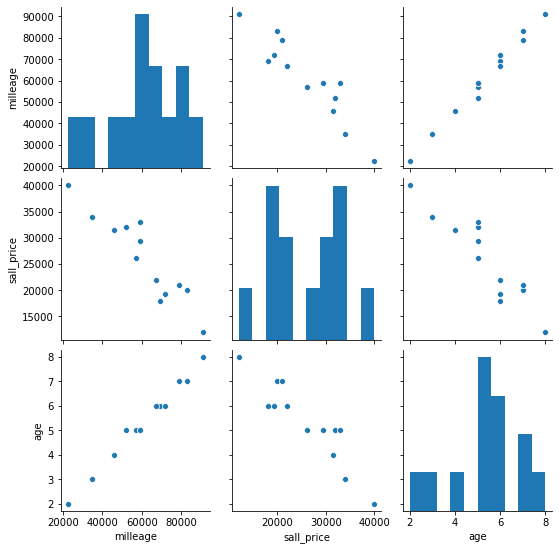

In [135]:
sns.pairplot(f)

In [136]:
df=pd.get_dummies(f.carmodeal)

In [137]:
df=pd.concat([df,f],axis="columns")

In [138]:
l=df.columns

In [139]:
l

Index(['AUDI_AS', 'BMW_XS', 'MERCEDEZ', 'carmodeal', 'milleage', 'sall_price',
       'age'],
      dtype='object')

In [140]:
#df=pd.DataFrame(df,columns=[l[3:]+l[:4]])

In [141]:

df

,AUDI_AS,BMW_XS,MERCEDEZ,carmodeal,milleage,sall_price,age
0,0,1,0,BMW_XS,69000,18000,6
1,0,1,0,BMW_XS,35000,34000,3
2,0,1,0,BMW_XS,57000,26100,5
3,0,1,0,BMW_XS,22500,40000,2
4,0,1,0,BMW_XS,46000,31500,4
5,1,0,0,AUDI_AS,59000,29400,5
6,1,0,0,AUDI_AS,52000,32000,5
7,1,0,0,AUDI_AS,72000,19300,6
8,1,0,0,AUDI_AS,91000,12000,8
9,0,0,1,MERCEDEZ,67000,22000,6


In [142]:
df.drop(["carmodeal","MERCEDEZ"],axis=1,inplace=True)

In [143]:
x=df.drop("sall_price",axis=1)

In [144]:
y=df.sall_price

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model=LinearRegression()


In [147]:
model.fit(x,y)

LinearRegression()

In [148]:
model.predict([[0,0,45000,4]])


array([36991.3172106])

In [149]:
model.score(x,y)

0.9417050937281083

In [150]:
import pickle

In [151]:
with open("E:\\data\\linearmodel","wb") as t:
    pickle.dump(model,t)

In [152]:
with open("E:\\data\\linearmodel","rb") as t:
    t=pickle.load(t)

In [153]:
t.predict([[0,0,45000,4]])

array([36991.3172106])

In [154]:
t

LinearRegression()

In [155]:
t.predict([[0,1,86000,7]])

array([11080.74313218])

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
u=LabelEncoder()

In [158]:
r=f

In [159]:
r.carmodeal=u.fit_transform(r.carmodeal)

In [160]:
x=r.iloc[:,[0,1,3]]

In [161]:
y=r.iloc[:,[2]]

In [162]:
from sklearn.preprocessing import OneHotEncoder